## Example - Detention Pond Model

This example illustrates the design and analysis of a detention pond
used to limit post-development peak runoff rates to their pre-
development levels. The post-development catchment area is the same
29 acre site used in the Site Drainage Model example, with the
addition of a storage node placed at the outlet of the catchment.
This storage unit and its associated outlet structure are designed
to control the peak runoff rates from the 2-yr, 10-yr, and 100-yr
design storms.

The example also includes a representation of the pre-development
catchment area (shown in scaled-down size on the Study Area Map)
so that its runoff hydrographs for the three design storms can be
compared to those of the detention pond's outflow.

The pond has a pyramidal shape with a length to width ratio of 2 and
side wall slope of 2. It is sized so that its volume is close to the
post- minus pre-development runoff volume for the 100-yr storm leaving
some amount of freeboard height available. The pond's outlet control
structure consists of a side orifice placed at pond's invert elevation
to control outflow for the smaller storm events and a weir placed some
distance above the pond's invert to limit outflow for the larger events.
These both discharge into a circular culvert that conveys outflow to
the drainage system's outfall.

Analyze each of the three design storms, in each case plotting the
time series of runoff from the pre-development subcatchment and the
total inflow to the post-development site's outfall node on the same
graph. Check to see that the pond meets its design goal.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.59'


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

from swmm_api import SwmmInput
from swmm_api.input_file.macros.plotting_map import (init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map,
                                                     add_node_labels, add_link_labels, add_subcatchments_labels)
from swmm_api.output_file import OBJECTS, VARIABLES
from swmm_api.run_swmm import swmm5_run_temporary, swmm5_run_progress

In [5]:
inp = SwmmInput('Detention_Pond_Model.inp')

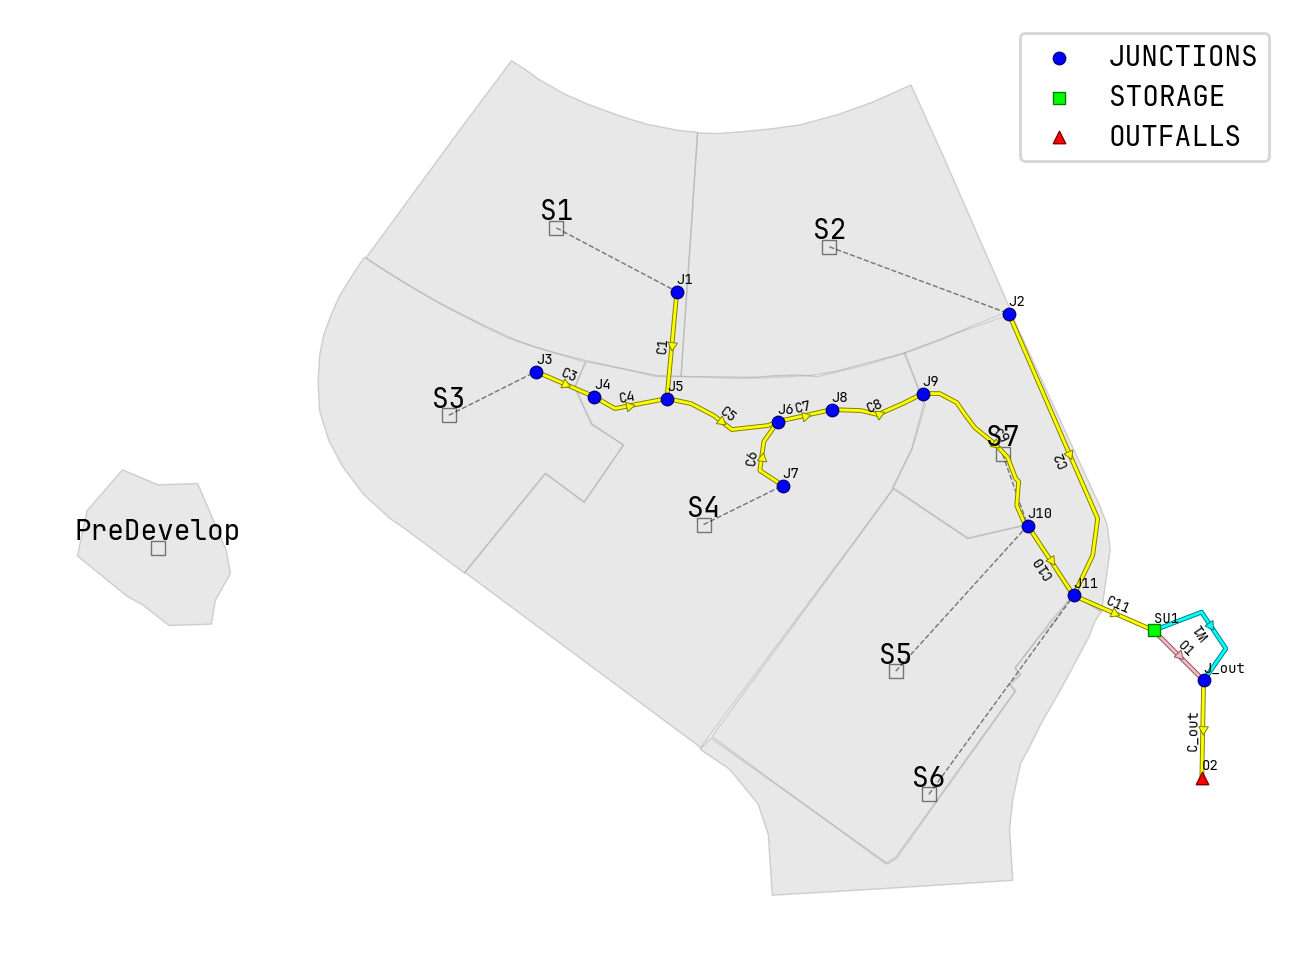

In [6]:
fig, ax = init_empty_map_plot()
add_subcatchment_map(ax, inp)
add_link_map(ax, inp, add_arrows=True)
add_node_map(ax, inp)
add_node_labels(ax, inp, ha='left', y_offset=15, size=5)
add_link_labels(ax, inp, y_offset=10, size=5)
add_subcatchments_labels(ax, inp, size=10, y_offset=15)

Plotting all the rainfall timeseries in the input file

In [7]:
df = pd.concat([
    inp.TIMESERIES[l].pandas for l in inp.TIMESERIES.keys()
], axis=1)
df.index = pd.to_timedelta(df.index, unit='h').round('min')
df.plot.bar(legend=True)

<Axes: >

In [8]:
inp.RAINGAGES

{   'RainGage': RainGage(name='RainGage', form='INTENSITY', interval='0:05', SCF=1.0, source='TIMESERIES', timeseries='2-yr', filename=nan, station=nan, units=nan)}

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpuey3vp14/example_run_swmm.inp:   0%|          | 0/10…

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpa3riojbe/example_run_swmm.inp:   0%|          | 0/10…

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpkxrgwr6h/example_run_swmm.inp:   0%|          | 0/10…

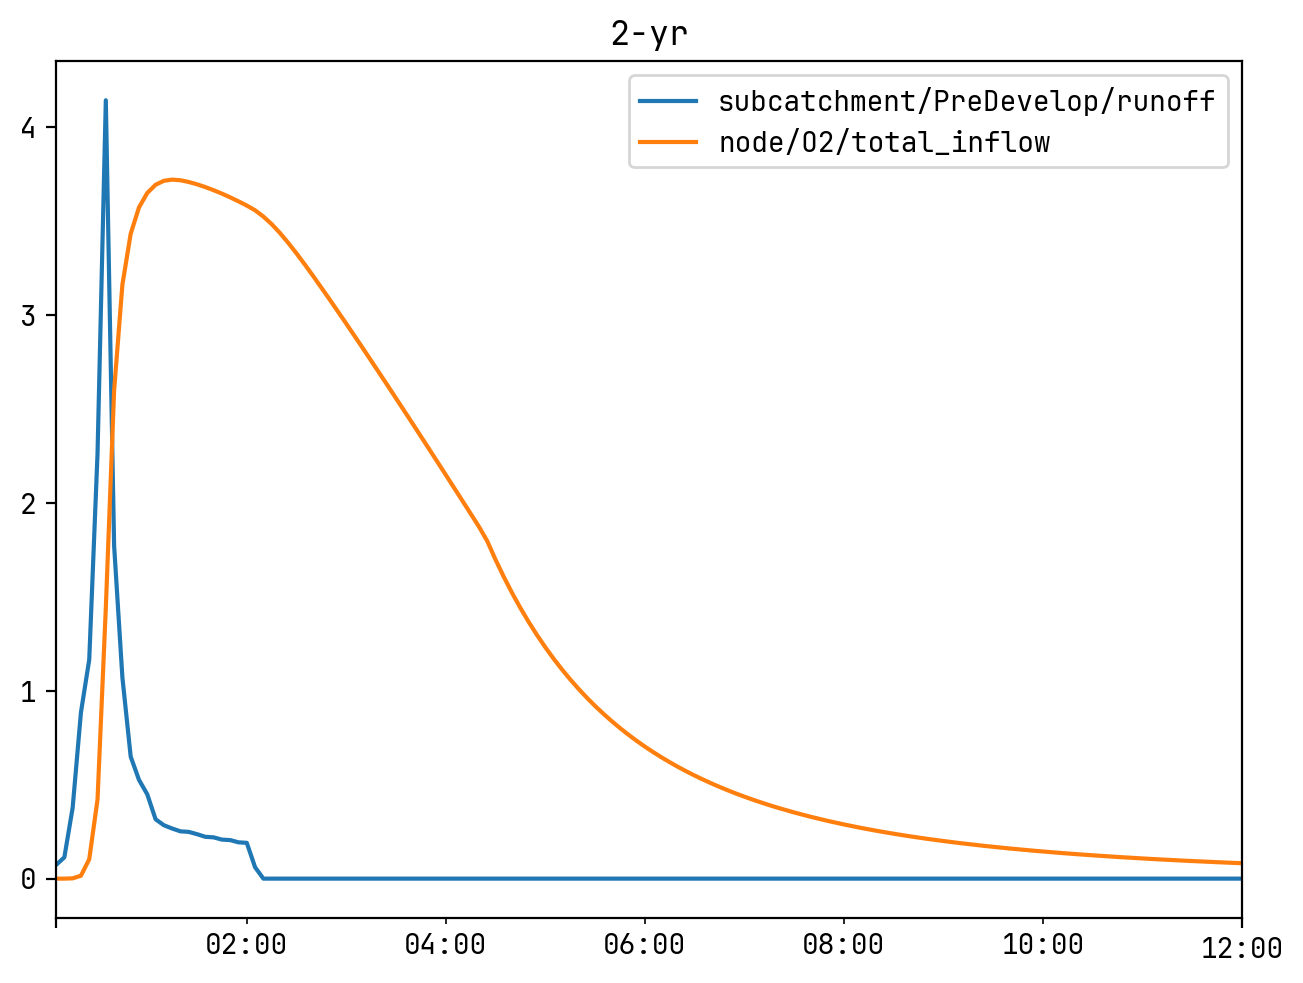

In [9]:
for ts_label in inp.TIMESERIES.keys():
    inp.RAINGAGES['RainGage'].timeseries = ts_label
    with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
        out = res.out  # type: SwmmOutput
        
        fig, ax = plt.subplots()
        out.get_part(OBJECTS.SUBCATCHMENT, 'PreDevelop', VARIABLES.SUBCATCHMENT.RUNOFF).plot(ax=ax)
        out.get_part(OBJECTS.NODE, 'O2', VARIABLES.NODE.TOTAL_INFLOW).plot(ax=ax)
        ax.legend()
        ax.set_title(ts_label)